# Generate Multi Label encoding for Strain Values

This document gives the potential for converting the db from a list or tuple of strains to a numpy array

Therefore 
[a,b,c] 
[a,c] 
[d] would become: 
 \[1,1,1,0] 
 \[1,0,1,0] 
 \[0,0,0,1] 


Useful for potential database analysis - k-mer distribution etc as well as potential for remaking the dict with eventual ML statistics which may also be more memory friendly.

Should be easier to save as well but so far it hasnt been lol.



## Loading a test database

In [31]:
import pickle
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

pickle_file = glob.glob("../new_databases/1280/*.pkl")[0]
with open(pickle_file,'rb') as ph:
    db = pickle.load(ph)

## Generate top dict elements and save to file to make sure its preserved

In [2]:
keylist = list(db.items())[:10]
keylist

[(b'CTTTTGGCTATTCGCTAATTCATCAAATAAG', {'GCF_900635805.1'}),
 (b'TTTTGGCTATTCGCTAATTCATCAAATAAGG', {'GCF_900635805.1'}),
 (b'TTTGGCTATTCGCTAATTCATCAAATAAGGG', {'GCF_900635805.1'}),
 (b'TTGGCTATTCGCTAATTCATCAAATAAGGGT', {'GCF_900635805.1'}),
 (b'TGGCTATTCGCTAATTCATCAAATAAGGGTT', {'GCF_900635805.1'}),
 (b'GGCTATTCGCTAATTCATCAAATAAGGGTTT', {'GCF_900635805.1'}),
 (b'GCTATTCGCTAATTCATCAAATAAGGGTTTT', {'GCF_900635805.1'}),
 (b'CTATTCGCTAATTCATCAAATAAGGGTTTTA', {'GCF_900635805.1'}),
 (b'TATTCGCTAATTCATCAAATAAGGGTTTTAA', {'GCF_900635805.1'}),
 (b'ATTCGCTAATTCATCAAATAAGGGTTTTAAA', {'GCF_900635805.1'})]

# Generate MultiLabel Encoding

In [33]:
mlb = MultiLabelBinarizer()
nf = mlb.fit_transform(db.values())
strains = mlb.classes_

# Print a subset
# strains[:5],nf[:10,:5]

OverflowError: signed integer is greater than maximum

In [34]:
del db

## Generate a dataframe quickly to reunite keys with values

In [7]:
df = pd.DataFrame(nf,index=db.keys())
df.columns = strains
df.index = df.index.str.decode('utf-8')
df.head()

NameError: name 'db' is not defined

In [8]:
df

,GCF_000009925.1,GCF_000210835.1,GCF_000710365.2,GCF_000710375.2,GCF_000724665.2,GCF_000724795.2,GCF_000724805.2,GCF_000724815.2,GCF_000965785.1,GCF_001286525.1,GCF_001682215.1,GCF_002849695.1,GCF_005706655.1,GCF_008369705.1,GCF_013267555.1,GCF_016864615.1,GCF_016889925.1,GCF_018292185.1
TTATCAACACCTATGTTAACAAGAAAAGAAT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1
TATCAACACCTATGTTAACAAGAAAAGAATT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1
ATCAACACCTATGTTAACAAGAAAAGAATTA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1
TCAACACCTATGTTAACAAGAAAAGAATTAC,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1
CAACACCTATGTTAACAAGAAAAGAATTACT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGCACCAGGTGCGTGATGCTCCAGAAAAG,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ACGCACCAGGTGCGTGATGCTCCAGAAAAGG,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
CGCACCAGGTGCGTGATGCTCCAGAAAAGGA,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
GCACCAGGTGCGTGATGCTCCAGAAAAGGAA,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Loading and unloading - pickle vs hdf5

Pickle has the fastest loading time, although hdf5 may be better for containing metadata

# Save the file

Note: for whatever reason, saving as numpy sucks, and saving with pandas is great UNLESS you remove the index (what)

Best approach then is to simply to df.to_csv() or something similar/simple

In [30]:
# df.to_csv('df_foo.csv')
y = df.to_numpy()
x = df.index.to_numpy()
x
# Alternatives
# np.savez('foo',nf) #fast but huge file # np.load('foo.npy') also fast

,GCF_000009925.1,GCF_000210835.1,GCF_000710365.2,GCF_000710375.2,GCF_000724665.2,GCF_000724795.2,GCF_000724805.2,GCF_000724815.2,GCF_000965785.1,GCF_001286525.1,GCF_001682215.1,GCF_002849695.1,GCF_005706655.1,GCF_008369705.1,GCF_013267555.1,GCF_016864615.1,GCF_016889925.1,GCF_018292185.1
TTATCAACACCTATGTTAACAAGAAAAGAAT,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True
TATCAACACCTATGTTAACAAGAAAAGAATT,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True
ATCAACACCTATGTTAACAAGAAAAGAATTA,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True
TCAACACCTATGTTAACAAGAAAAGAATTAC,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True
CAACACCTATGTTAACAAGAAAAGAATTACT,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGCACCAGGTGCGTGATGCTCCAGAAAAG,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
ACGCACCAGGTGCGTGATGCTCCAGAAAAGG,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
CGCACCAGGTGCGTGATGCTCCAGAAAAGGA,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
GCACCAGGTGCGTGATGCTCCAGAAAAGGAA,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


## Convert back to string

In [155]:
df.index = df.index.str.decode('utf-8')

In [14]:
df.to_hdf('hdf_hi.h5','df') #10s
# df.to_pickle('pickle_hi.pkl') # 8s

In [15]:
pd.read_hdf('hdf_hi.h5','df') #20s
# pd.read_pickle('pickle_hi.pkl') # 10s

,GCF_000012185.1,GCF_000165525.1,GCF_000165575.1,GCF_000197875.1,GCF_000200475.1,GCF_000210875.1,GCF_000465255.1,GCF_000698365.1,GCF_000767075.1,GCF_000931575.1,...,GCF_900475535.1,GCF_900475755.1,GCF_900475995.1,GCF_900478275.1,GCF_900478325.1,GCF_900478735.1,GCF_900635795.1,GCF_900635805.1,GCF_900638105.1,GCF_901472485.1
CTTTTGGCTATTCGCTAATTCATCAAATAAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TTTTGGCTATTCGCTAATTCATCAAATAAGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TTTGGCTATTCGCTAATTCATCAAATAAGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TTGGCTATTCGCTAATTCATCAAATAAGGGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TGGCTATTCGCTAATTCATCAAATAAGGGTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGTCTCACAGCCACAATCGGCACACCGTAAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GTCTCACAGCCACAATCGGCACACCGTAAAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCTCACAGCCACAATCGGCACACCGTAAAGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTCACAGCCACAATCGGCACACCGTAAAGCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploration of the dataset


In [21]:
df = df.astype(bool)
sys.getsizeof(df) // 1e6

4531.0

### Additional options, numpy features

In [82]:
nf.max(axis=0)
# sum(axis=1) returns the number of strains for each k-mer
len_dist = nf.sum(axis=1)
len(nf.sum(axis=0))

66

In [ ]:
nz = df.to_numpy()
import pandas as pd
df2 = pd.DataFrame
x = df2.to_numpy()

In [32]:
db2 = dict(zip(db.keys(),list(nf)))

In [54]:
max_strain = nf[:50].sum(axis=0).argmax()
mlb.classes_[max_strain]

'GCF_900635805.1'

In [31]:
sys.getsizeof(db2) // 1e6
mlb.classes_

671.0

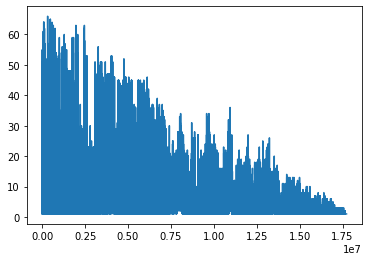

In [67]:
import numpy as np
import matplotlib.pyplot as plt
# sum(axis=1) returns the number of strains for each k-mer
len_dist = nf.sum(axis=1)
len(nf.sum(axis=1))
plt.plot(len_dist)


In [ ]:
db2 = {k:v for k,v in db.items() if len(v) > 35}
print(len(db2))


In [ ]:
db2 = {k:list(v) for k,v in db2.items()}


In [ ]:
df = pd.Series(db2)
df.head()

In [ ]:
df2 = pd.DataFrame(df.values.tolist()).stack().str.get_dummies()
